<a href="https://colab.research.google.com/github/tikenM/Music-Genre-Classification/blob/main/music.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
np.random.seed(123)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Upload the required file for analysing.

In [ ]:
#from google.colab import files
#import pandas as pd

#uploaded = files.upload()  # Loading data from the computer disk


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

In [ ]:
#filename='features_3MODIFIED_sec.csv'
df=pd.read_csv("/content/drive/MyDrive/MusicGenre/features_3MODIFIED_sec.csv")   #reading CSV file.
df.head()

#1. Features selection with correlation value and P-value

The dataset that is collected and processed is an extensive collection of features. All the components of the dataset may not be necessary for building machine learning models. It is usually observed that some features may make prediction worse. So, finding a relationship between different dataset features and selecting only the necessary methods plays a significant role in machine learning prediction. Therfore, in this study, we explore two methods to clean the redundant features in the dataset.

##1.1 Correlation

>Definition 1.1 (Correlation):
Correlation is a bivariate analysis that measures the strengths of association between two variables and the direction of the relationship. In terms of the strength of the relationship, the correlation coefficient value varies between +1 and -1 [[Ref1](https://en.mimi.hu/mathematics/correlation.html)].

So, according to the definition, if two variables $x_1$ and $x_2$ are linearly independent such that $x_1= 2x_2$, then two variables correlate to each other. Suppose such variables (data features) exists in the dataset, where a feature is linearly dependent on other feature or features. In that case, we will use only one feature among the highly correlated features. 

>Let $X\in \mathbf{R}^{m \times n}$ features set having $m$ dataset and $n$ number of features for each dataset. Let $x^{(i)} \in \mathbf{R}^m$ where $i\in n$ represent a feature in the dataset $X\in \mathbf{R}^{m \times n}$. The correlation ($r_{ij}$)[[Ref2]](https://doi.org/10.1016/B978-0-08-097086-8.72056-3)  between $x^{i}$ and $x{j}$ where $i, j \in n$ is given by

\begin{equation}
  r_{ij} = \frac{\sum_{k=1}^{m}(x^{i}_{k}-\mu^{i})(x^{j}_k-\mu^{j}) }{\sqrt{\sum_{k=1}^{m}(x^{i}_{k}-\mu^{i})^2 \sum_{k=1}^{m}(x^{j}_{k}-\mu^{j})^2  }} \tag{1}
\end{equation}

where $\mu^{i}$ is the mean of feature $i \in X$.


>Using equation (1), we determine a correlational table of all the features of $X\in \mathbf{R}^{m \times n}$. The matrix may be represented as

\begin{bmatrix}
r_{11} & r_{21} &\cdots & r_{n1}\\
r_{12} & r_{22} & \cdots & r_(n2)\\
\cdots & \cdots & \cdots &\cdots\\
r_{1m} &r_{2m} & \cdots & r_{mn}\\
\end{bmatrix}

From the above matrix representation, we select the column where the $r_{ij} <0.9$. It is done to eliminate all the highly correlated features from the dataset.

 




In [ ]:
data = df.iloc[:,1:-1] #The code to remove all unnecessary features from the data like label, name of songs etc.


In [ ]:
data

In [ ]:
corr = data.corr() #You are calculating a correlation matrix Corr.


In [ ]:
sns.heatmap(corr) #Visualizing the correlation matrix and show the value ranges of the matrix.

#Note
The code below shows how to select features that have a correlational value of less than 90%. (This code should be part of the appendix. and should not be part of the main report.) However, the heatmap graph should be part of your report and should be adequately explained.

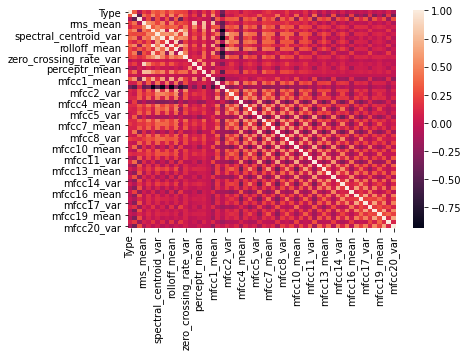

In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

##1.2 P Value

Correlation and P-Value are both used to establish a relationship between features in the dataset. Though the correlation is a way to test if two variables have any (dependent) relationship, we need to check whether the connection between outcome (classification class) and feature is statistically significant. Among several techniques [[Ref5]](https://www.sagepub.com/sites/default/files/upm-binaries/40007_Chapter8.pdf), we choose P-value to test the significant relationship between features and outcomes.

>Definition 2 (P-Value) [[Ref4](https://dataschool.com/fundamentals-of-analysis/)]: P-Value is defined as the probability of obtaining results 'as extreme' or 'more extreme,' given that the null hypothesis[[Ref5]](https://www.sagepub.com/sites/default/files/upm-binaries/40007_Chapter8.pdf) is true.

In order to test the significance of a feature to the genre of the music, we calculate P-value corresponds to each feature $x^{i}$ $\forall i\in n$. This P-value is evaluated to reject the Null Hypothesis. The Null Hypothesis states that there is no relationship between $x^i$ and the type of genre of music. So, if we successfully reject the hypothesis for a feature, it shows how statistically significant the result obtained in the classification algorithm.
In order to calculate P-value, we compute t-test ($t_{ij}$)for each feature $x^i$ in comparison with music genre classes as follow:

 \begin{equation}
t_{ij}= \frac{(\mu_i - \mu_j)}{\sqrt{SE^2 (\frac{1}{m}+\frac{1}{m}})}
 \end{equation} 

 where $SE = \frac{\sigma_j}{\sqrt{m}}$, and $s_j$ is the standard deviation of genre class $j$.
 Once, t-test value is obtained, we calculate P-value as
 \begin{equation}
    \text{P Value}_{ij}= 2 \times CDF(|t_{ij}|)
 \end{equation}

where $CDF()$ is the cumulative distribution function of the distribution of the test statistic under the Null Hypothesis.

Suppose a particular P value of a feature is less than 0.05. In that case, we reject that the Null Hypothesis is false, and the feature is collected as a part of the dataset for designing the classification model.


In [ ]:
import statsmodels.api as sm
regressor = sm.OLS(data.iloc[:,0].values, data.iloc[:,1:].values).fit()
print(regressor.summary())

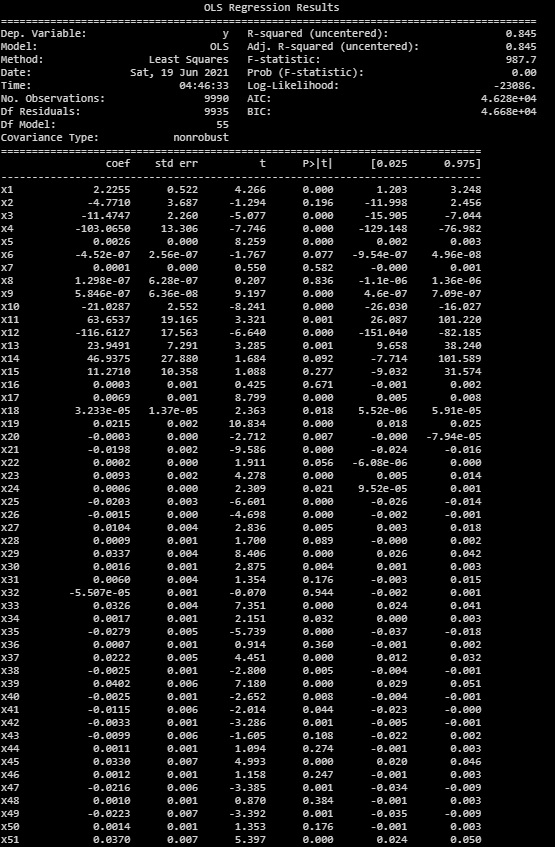

Figure 1: P Values ($P>|t|$) for different features.

The above result shows P Values ($P>|t|$) for different features. It shows some of the features have a higher value than 0.05 (threshold value). So, these features are rejected and will not be used for modeling the learning algorithm.

In [ ]:
selected_columns = selected_columns[1:].values
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
   
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    print(regressor_OLS.summary())
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)

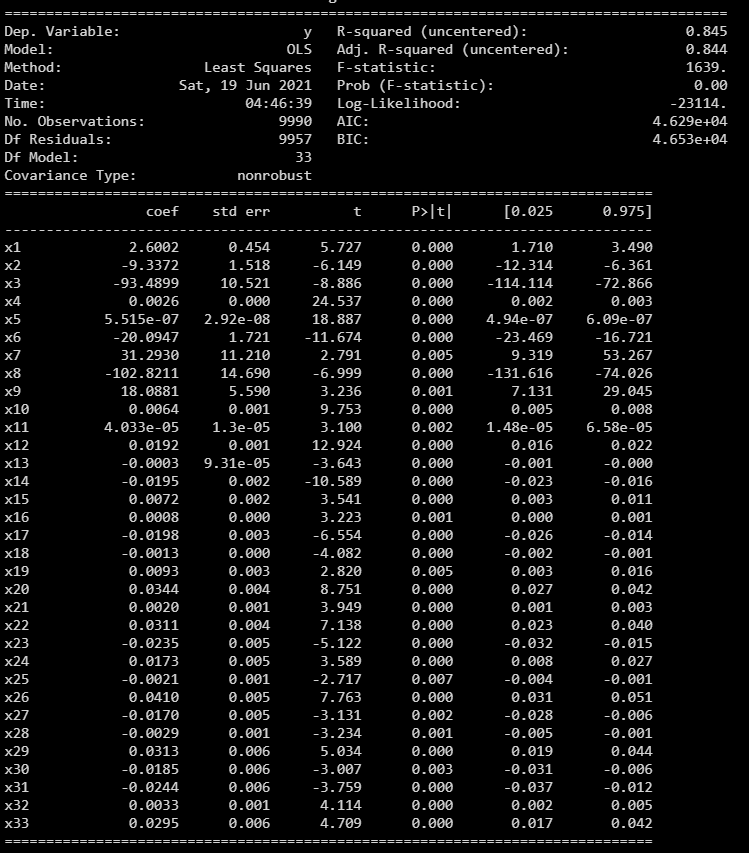The above result shows P Values ( P>|t| ) for different features. It offers only the features that this report will use for modeling the learning algorithm for the classification of music genres.


In [ ]:
result = pd.DataFrame()
result['Type'] = data.iloc[:,0]
data = pd.DataFrame(data = data_modeled, columns = selected_columns)



The distribution graphs below show the normal distribution of each feature selected using P-Value. Each chart shows that there is no abnormal distribution of data among the features. 

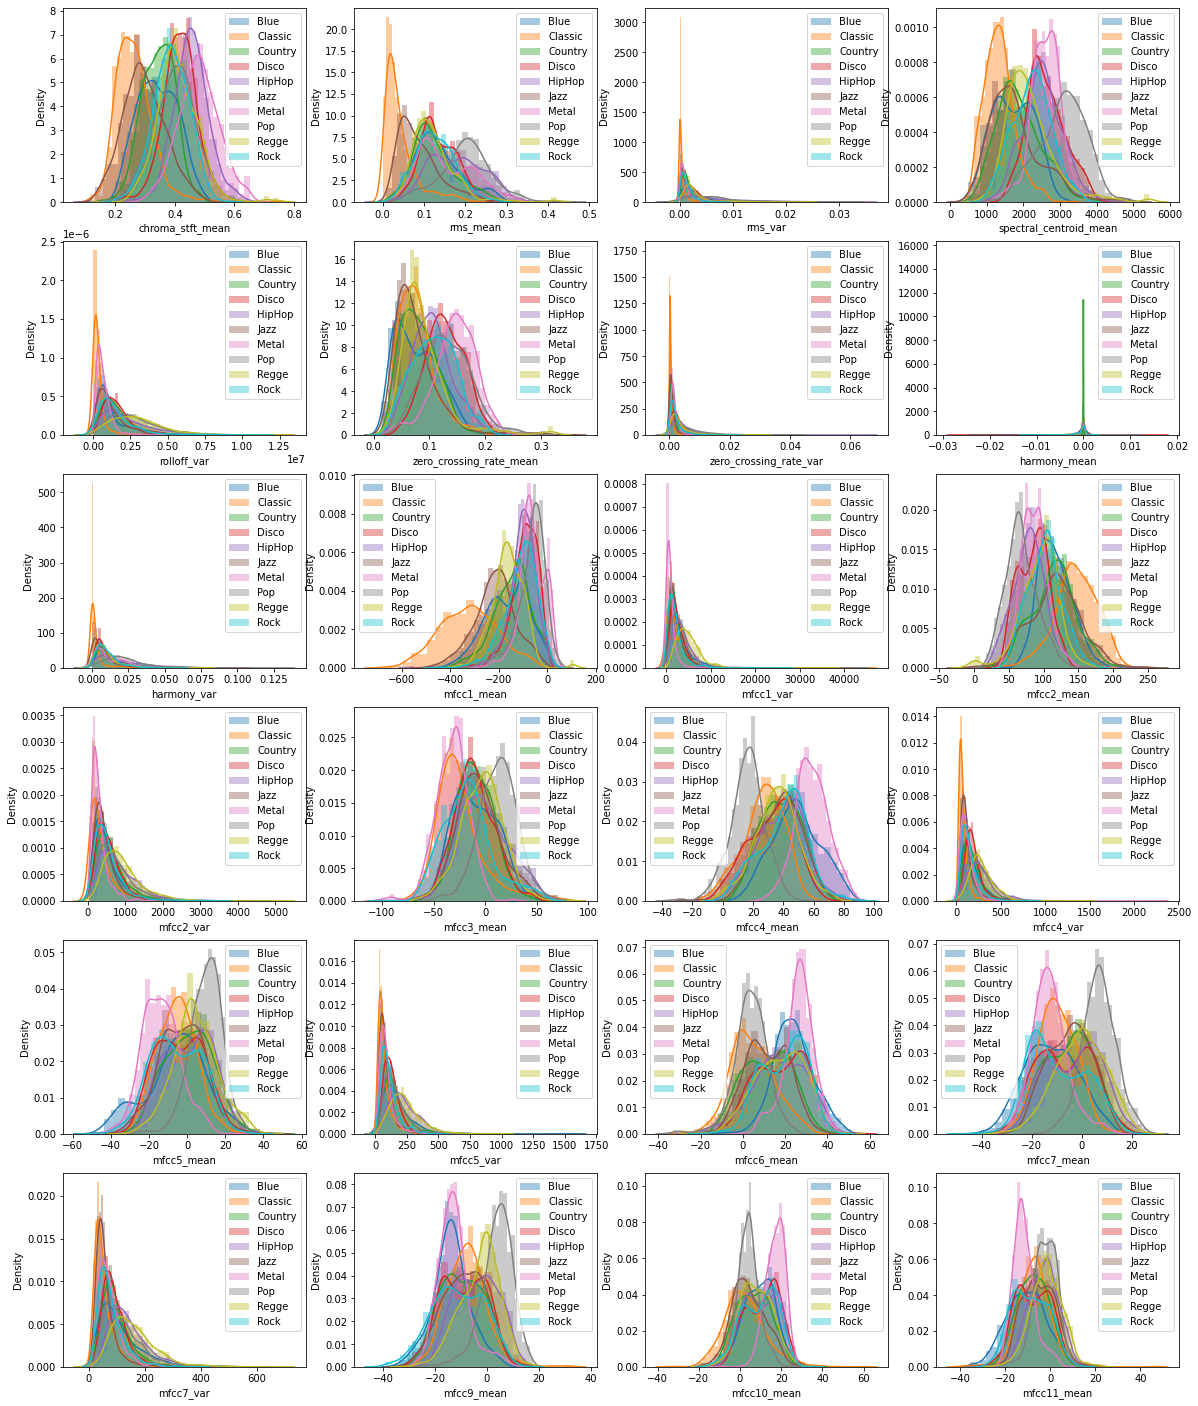

In [ ]:
fig = plt.figure(figsize = (20, 35))
j = 0
for i in data.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(data[i][result['Type']==1], color='tab:blue', label = 'Blue')
    sns.distplot(data[i][result['Type']==2], color='tab:orange', label = 'Classic')
    sns.distplot(data[i][result['Type']==3], color='tab:green', label = 'Country')
    sns.distplot(data[i][result['Type']==4], color='tab:red', label = 'Disco')
    sns.distplot(data[i][result['Type']==5], color='tab:purple', label = 'HipHop')
    sns.distplot(data[i][result['Type']==6], color='tab:brown', label = 'Jazz')
    sns.distplot(data[i][result['Type']==7], color='tab:pink', label = 'Metal')
    sns.distplot(data[i][result['Type']==8], color='tab:gray', label = 'Pop')
    sns.distplot(data[i][result['Type']==9], color='tab:olive', label = 'Regge')
    sns.distplot(data[i][result['Type']==10], color='tab:cyan', label = 'Rock')
 
    
    plt.legend(loc='best')
fig.suptitle('Music Genre Features')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

#2. Classification Algorithm
After a detailed analysis of music data, we move forward with modeling different classification algorithms to classify the genre of the music. We will consider two learning algorithms in this study and will compare the performance among them.

We observe that all features are not linearly separable from each other during the analysis of music genre data (from the Gaussian distribution graphs above). So, classification using simple  regression will be a tiresome work as we need to define a polynomial hypothesis that separate 33 feature for a class. Due to the complexity of choosing a hypothesis, we in this study focus on non-linear hypothesis-based classification algorithms. As a result, we consider Artificial Multiclass Logistic Regression, Neural Network and Support Vector Algorithm to design the classification model for the music genres. We will consider three models to classify the music genre from the dataset that we processed. After cleaning and removing redundant data, we move forward in defining the hypothesis for each of the models we will use in this study.


In [ ]:
#with open('/content/drive/MyDrive/MusicGenre/DataMusicX.txt', 'w') as f:np.savetxt(f,data.values );
#with open('/content/drive/MyDrive/MusicGenre/DataMusicY.txt', 'w') as f:np.savetxt(f,result.values );


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#with open('/content/drive/MyDrive/MusicGenre/DataMusicX.txt', 'r') as f: data = np.loadtxt(f)
#with open('/content/drive/MyDrive/MusicGenre/DataMusicY.txt', 'r') as f: result = np.loadtxt(f)
#from sklearn.model_selection import train_test_split
#X, X_test, y, y_test = train_test_split(data, result, test_size = 0.4, random_state = 0)
#X_cr, X_test, y_cr, y_test = train_test_split(X_test, y_test, test_size = 0.50, random_state = 0)


In [ ]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(data.values, result.values, test_size = 0.4, random_state = 0)
X_cr, X_test, y_cr, y_test = train_test_split(X_test, y_test, test_size = 0.50, random_state = 0)


In [ ]:
from sklearn.preprocessing import StandardScaler  #normalize the data
sc = StandardScaler()
X = sc.fit_transform(X)
X_cr = sc.fit_transform(X_cr)
X_test = sc.transform(X_test)

## 2.1. Artificial Neural Network 
###2.1.1 Model Representation
A neural network is an interconnection network between simple computational units called a neuron. It takes an input and is channeled to an output. In our model, a set of computational units take $X =\{x^{0}, x^{1},x^{2}, \cdots,x^{n}\}$ features of the music genre and output results based on hypothesis $h_{\theta}(x)$. The feature $x^0$ is called a "bias unit," and its value equals 1. In the model, logistic function $g(\theta^T x)= \frac{1}{1+\mathbf{e}^{-\theta^Tx}}$ is used as activation function where $\theta$ is called as "weight".

In this study, we consider three-layer neural network architecture-Input layer, hidden layer, and output layer. Let $a_i^{(j)}$ be the activation of computational unit $i$ in the layer $j$, and $\Theta^j$ be the matrix weight controlling the mapping from layer $j$ to layer $j+1$. 

In this model, we model the neural architecture as
\begin{equation}
[a_0^{(1)}a_{1}^{(1)}a_{2}^{(1)} \cdots a_{k_1}^{(1)}] {\underset{\Theta^{1}}\rightarrow} \cdots [a_{0}^{(j)}a_{1}^{(j)}a_{2}^{(j)} \cdots a_{k_j}^{(j)}] {\underset{\Theta^{j}}\rightarrow} \cdots h_\theta(x) \tag{2}
\end{equation}

where $k_{j}$ is the size of hidden layer $j$, $a_0^{(j)}=1$ is a bias unit (ignore here), and $$\{a_{1}^{(1)}a_{2}^{(1)} \cdots a_{k_1}^{(1)}\} =\{x^{1}x^{2} \cdots x^{n}\} $$

The value of $\{a_{1}^{(j)}a_{2}^{(j)} \cdots a_{k_j}^{(j)}\}$ is obtained as

\begin{align*} 
a_1^{(j)} = g(\theta_{10}^{(j-1)}a_0^{(j-1)} + \theta_{11}^{(j-1)}a_1^{(j-1)} + \theta_{12}^{(j-1)}a_2^{(j-1)} +\cdots+\theta_{1k_{j-1}}^{(j-1)}a_{k_{j-1}}^{(j-1)}) \newline
a_2^{(j)} = g(\theta_{20}^{(j-1)}a_0^{(j-1)} + \theta_{21}^{(j-1)}a_1^{(j-1)} + \theta_{22}^{(j-1)}a_2^{(j-1)} +\cdots+\theta_{2k_{j-1}}^{(j-1)}a_{k_{j-1}}^{(j-1)}) \newline
\cdots\cdots\cdots\cdots\cdots\cdots\cdots\cdots\cdots\cdots\cdots\cdots\cdots\cdots\cdots\cdots\cdots\cdots\cdots\cdots\cdots\newline
a_{k_j}^{(j)} = g(\theta_{k_j0}^{(j-1)}a_0^{(j-1)} + \theta_{k_j1}^{(j-1)}a_1^{(j-1)} + \theta_{k_j2}^{(j-1)}a_2^{(j-1)} +\cdots+\theta_{k_jk_{j-1}}^{(j-1)}a_{k_{j-1}}^{(j-1)}) \newline \tag{3}
\end{align*}

So, if $j$ is the last layer (output layer) of the neural network classifying C number of classes, then we have the hypothesis. 

\begin{equation}
h_\theta(x)= [a_1^{j+1}, a_2^{j+1}, a_3^{j+1}, \cdots, a_C^{j+1}] \tag{4}
\end{equation}

In our model, we define weight $\Theta^{j} \in \mathbf{R}^{k_{j+1}\times (k_j+1)}$ as

\begin{bmatrix}
\theta_{10}^{(j)} & \theta_{11}^{(j)} &\cdots & \theta_{1k_{j}}^{(j)}\\
\theta_{20}^{(j)} & \theta_{21}^{(j)} &\cdots & \theta_{2k_j}^{(j)}\\
\cdots & \cdots & \cdots &\cdots\\
\cdots & \cdots & \cdots &\cdots\\
\theta_{k_{j+1}0}^{(j)} & \theta_{k_{j+1}1}^{(j)} &\cdots & \theta_{k_{j+1}k_j}^{(j)}\\
\end{bmatrix}

From this model, we know that the result of the output layer and whole computational units in each layer work based on the value of $\Theta$. So, we need to find a way to calculate these values to have a good classification model, and in fact, the learning model moves around optimizing the values of $\Theta$. 
###2.1.2 Cost Function of Neural Network
In optimizing $\Theta$, we need to devise a method to obtain costs incurred by different values of $\Theta$ while classifying the music genre from features.  The cost here refers to the amount of error in classifying a music genre correctly.  Again, to optimize $\Theta$, we have to choose a cost function $f$ such that it always gives a convex function for any value of features and output. To fulfill the convexity properties of the cost function $f_c$ , we ignore the mean square cost error function [[Ref]](https://arxiv.org/abs/1809.03006) , which is a trendy method of representing the cost function as it causes many local optima problems. As we need convexity in the cost function, we use a logarithmic function for describing the cost.

Given training data, we consider a single feature set $x^{i}$ with its label $y^{i}$ $\forall i\in m$ and define the cost function for feature set $i$ over C number of outputs.  

\begin{align*}& f^i(\Theta) = \sum_{c=1}^C \mathrm{Cost}(h_\theta(x^{(i)}),y_c^{(i)}) + \text{Regularizing Term} \newline & \mathrm{Cost}(h_\theta(x),y_c) = -\log(h_\theta(x)) \; & \text{if $y_c$ = 1} \newline & \mathrm{Cost}(h_\theta(x),y_c) = -\log(1-h_\theta(x)) \; & \text{if $y_c$ = 0}\end{align*}

We write the cost function as
\begin{align*}
f^i(\Theta) = \sum_{c=1}^C -y_c^{i}\log(h_\theta(x))-(1-y_c^{i})\log(1-h_\theta(x)) + \text{Regularizing Term} \tag{5}
\end{align*}

The regularization term is added in the cost model of the learning algorithm to control the high variance and high bias of the learning model.

>>>Definition (High Bias (Underfitting)): It is the condition of a learning model when hypothesis function h poorly maps to the data's tend. 

It is resulted due to the use of simple hypothesis function or small feature data.
>>>Definition (High Variance (Overfitting)): It is a condition of a learning model where the hypothesis function does not generalize itself better to predict new data, but it fits perfectly to the training data.

It is generally due to an unnecessary complex learning model that creates curves and angles that fit perfectly to the training data. Infact, the Regularizing term defines how much the cost of the $\Theta$ is inflated. Thus, it controls the influence of theta on the cost function. We add this term to prevent high bias and variance of the learning model and give the correct model to classification the music genre.

From Equation (4), we now derive the cost function for $m$ set of music features. It is defined below with a regularization term where $\lambda  \in \mathbf{R}$. In the cost function $f(\Theta)$, we will smooth the output of the hypothesis function $(h_\Theta(x))$ if we want to reduce the overfitting of data on the model. If $\lambda$ is chosen to be too large, it may smooth out the function too much and cause underfitting. So, we will select the value of $\lambda$ experimentally by going through the dataset.

\begin{gather*} f(\Theta) = - \frac{1}{m} \sum_{i=1}^m \sum_{c=1}^C \left[y^{(i)}_c \log ((h_\Theta (x^{(i)}))_c) + (1 - y^{(i)}_c)\log (1 - (h_\Theta(x^{(i)}))_c)\right] + \frac{\lambda}{2m}\sum_{l=1}^{L-1} \sum_{i=1}^{k_j} \sum_{z=1}^{k_{j+1}} ( \theta_{zi}^{(l)})^2\end{gather*} where $L$ is number of layer that is used in the learning model.

The regularization term account for $\Theta^l$ $\forall l\in L-1$ values uses at different layers of the learning models. If $\Theta^1$, $\Theta^2$ $\cdots$ $\Theta^{L-1}$ are used in the model for layer $1$ to $L-1$, we sum up each row and column of  $\Theta$ matrix.

### 2.1.3 Optimization of $\Theta$

Once we define the cost function, the main objective of the learning model is to minimize cost function $f$, i.e.,

 $$\min_{\Theta} f(\Theta)$$

Therefore, the optimization objective of the learning model is calculated by computing the partial derivative of $f(\Theta)$, i.e.,$$\frac{\partial f(\Theta)}{\partial \theta^{l}_{iz}}$$

In order to perform the optimization of the cost function, we will use the back propagation algorithm.

>Algorithm 1: Back Propagation Algorithm

>>Inpute: Traing Set $\{(x^{1},y^{1}), (x^{2},y^{2}) \cdots (x^{m},y^{m})\}$

>>Output: $\frac{\partial f(\Theta)}{\partial \theta^{l}_{zi}}$

>>For $t=1$ to $m$
>>>Setp 1: Set $\Delta_{zi}^l := 0$ $\forall$ $l-1\in L$, $z\in k_{j+1}$, $i \in k_j$

>>>Step 2: Set $a^{1}$ $:=$ $x^{t}$

>>>Step 3: Compute $a^{l}$ $\forall$ $l \in \{1, \cdots, L-1\}$ using Equation (3).

>>>Step 4: Compute $\delta^{L} = a^{L}-y^t$.

>>>Step 5: Compute $\delta^{L-1}$, $\delta^{L-2}$, $\delta^{L-3}$, $\cdots$, $\delta^{2}$ using $\delta^l$ $=$ (($\Theta^l)^{T}$$\delta^{l+1}$)$.*$ $a^l$.* ($1-a^l$)

>>>Step 6: $\Delta^l_{zi}:= \Delta^l_{zi} + a_z^{l+1} \delta_z^{l+1}$

>>Step 7: $\frac{\partial f(\Theta)}{\partial \theta^{l}_{zi}}$ $:=$ $\frac{1}{m}$ ($\Delta^l_{zi}$ + $\lambda \theta_{zi}^l$) $\forall i\neq 0$

>>Step 8: $\frac{\partial f(\Theta)}{\partial \theta^{l}_{zi}}$ $=$ $\frac{1}{m}$ ($\Delta^l_{zi})$ $\forall i = 0$

So, the final optimization algorithm is 

\begin{align*}& Repeat \; \lbrace \newline & \; \theta_{zi} := \theta_{zi} - \alpha \dfrac{\partial}{\partial \theta_{zi}}f(\Theta) \; \forall\; z \in k_{j+1},\; i \in k_j \newline & \rbrace \tag{6}
\end{align*}

where $\alpha \in \mathbf{R}$ is called a learning rate of the model.

## 2.2 Multiclass classification Using Logistic Regression
###2.2.1 Learning Model
In this learning model, the goal is to define a hypothesis ($h$) such that $$h:X \rightarrow y$$ given $X\in \mathbf{R}^{m \times n}$ and $0\leq y \leq 1 \in \mathbf{R}^m$, the corresponding label of feature set $X$.

So, generally, the hypothesis function (a mapping function between $X$ and $y$) is defined below. For simplicity, we consider the case of a single feature set $x^i$ $\forall i \in m$.

$$h_{\theta}(x^{i}) = g(\theta_0x^{i}_0 + \theta_1x^{i}_1+ \cdots + \theta_n x^{i}_n)$$
$$\implies h_{\theta}(x^{i}) = g(\theta^Tx^{i})$$
where $g$ is sigmoid function defined in section 2.1.1. The $\theta \in \mathbf{R}^{n+1}$  is the parameter that influences the output of our learning algorithm.

Here, $h_θ​(x^i)$ gives us the probability that the output is 1 for the feature set $x^i$. For example, $h_\theta(x^i)$ =0.7 gives us a probability of 70% that our output is 1. The probability that the prediction is 0 is just the complement of our probability that it is 1 (e.g., if the probability of 1 is 70%, then the probability that it is 0 is 30%).
Thus,

\begin{align*}& h_\theta(x^i) = P(y=1 | x^i ; \theta) = 1 - P(y=0 | x^i ; \theta) \newline& P(y = 0 | x^i;\theta) + P(y = 1 | x^i ; \theta) = 1\end{align*}

However, this hypothesis output works only when we have two output classes while applying to all the training data set.

Now therefore, we approach the classification of data when we have more than two categories. Instead of $y = \{0,1\}$, we expand the definition so that $y = \{0,1, \cdots, n\}$ where $0,1,2, \cdots,n$ is the genre class of music data.

Since $y = {0,1, \cdots ,n}$, we divide the problem into $n+1$ ($+1$ because the index starts at $0$) binary classification problems; in each one, we predict the probability that $y$ is a member of one of the music genre classes.

Thus,

\begin{align*}& y \in \lbrace0, 1 ... n\rbrace \newline& h_\theta^{(0)}(x) = P(y = 0 | x ; \theta) \newline& h_\theta^{(1)}(x) = P(y = 1 | x ; \theta) \newline& \cdots \newline& h_\theta^{(n)}(x) = P(y = n | x ; \theta) \newline& \mathrm{prediction} = \max_i( h_\theta ^{(i)}(x) )\newline \tag{7}
\end{align*}

The main objective of this model is also to learn the optimal value of $\theta$, which classifies a data set into a correct class.

Similar to the cost function in Equation (5), we redefine the cost function of the logistic regression classification model as

###2.2.2 Optimization of $\theta$
To calculate the optimal value of $\theta$, we need to define cost (error) incurred by the hypothesis $h_\theta(x)$ while classifying a dataset into a music genre class.

Following the convexity principle of model 2.1, we use the same cost model in this model to define the error in predicting a class based on a given $\theta$.

\begin{align*}
f(\Theta) = \frac{1}{m}\sum_{i=1}^m -y\log(h_\theta(x))-(1-y)\log(1-h_\theta(x)) + \frac{\lambda}{2m}\sum_{j=1}^{n} \theta^2_j 
\end{align*}

where $\frac{\lambda}{m}\sum_{j=1}^{n} \theta^2_j$ is the regularization term as define in section 2.1. 

Once we define the cost function, the main objective of the learning model is to minimize cost function $f$, i.e.,

 $$\min_{\theta} f(\theta)$$

Therefore, the optimization objective of the learning model is calculated by computing the partial derivative of $f(\Theta)$, i.e.,$$\frac{\partial f(\theta)}{\partial \theta_{i}}$$

The optimization algorithm uses in this study is defined below.

\begin{align*}& Repeat \; \lbrace \newline & \; \theta_{i} := \theta_{i} - \alpha \dfrac{\partial}{\partial \theta_{i}}f(\Theta) \; \forall\; i \in m+1  \newline & \rbrace \tag{6}
\end{align*}

where
$$\dfrac{\partial}{\partial \theta_{j}}f(\theta) = \frac{1}{m}\sum_{i=0}^m(h_\theta(x^{i})-y^{i})x^i_j) + \frac{\lambda}{m}\theta_j \; \forall j\neq0 $$

$$\dfrac{\partial}{\partial \theta_{j}}f(\theta) = \frac{1}{m}\sum_{i=0}^m(h_\theta(x^{i})-y^{i})x^i_j) \; \forall j=0 $$

$\alpha \in \mathbf{R}$  is called a learning rate of the model, and $\lambda \in \mathbf{R}$ is the regularization parameter.


##2.3 Support Vector Machine
By now, we have seen a range of different learning algorithms. With supervised learning, the performance of many supervised learning algorithms will be pretty similar, and what matters less often will be whether you use learning algorithm $a$ or learning algorithm $b$. Still, what matters more will often be things like the amount of data we create these algorithms on. But, there is one more algorithm that is very powerful and is very widely used both within industry and academia, and that's called the support vector machine [[SVM]](https://dl.acm.org/doi/10.5555/2998981.2999021). And compared to both logistic regression and neural networks, the Support Vector Machine, or SVM, sometimes gives a cleaner and sometimes a more powerful way of learning complex non-linear functions. 
###2.3.1 Model
Unlike logistic regression where $h_\theta(x)$ is bounded between $0$ and $1$, we want the hypothesis function to have the following properties:

\begin{equation}
  h_\theta(x)=\left\{
    \begin{array}{ll}
      1, & \mbox{if $\theta^Tx\geq1$}.\\
      0, & \mbox{if $\theta^Tx\leq-1$}. \tag{7}
    \end{array}
  \right.
\end{equation}
Thus, this implies that the learning model should classify the music genre class of a feature set instead of providing a probability of being in a music genre class.

The $\theta \in \mathbf{R}^{m+1}$  is the parameter that influences the output of our learning algorithm. The main objective of this model is also to learn the optimal value of $\theta$, which classifies a data set into a correct class.


###2.3.2 Cost Function and Optimization Objective
To calculate the optimal value of $\theta$ , we need to define cost (error) incurred by the hypothesis $h_\theta(x)$  while classifying a dataset into a music genre class. Similar to the cost function of the logistic regression classification model we define the cost function of this learning model obhective as below.

\begin{align*}
\min_\theta f(\Theta) = \min_\theta \frac{1}{m}\sum_{i=1}^m y^i\;cost_1(\theta^Tx^i)+(1-y^i)\; cost_0(\theta^Tx^i) + \frac{\lambda}{2m}\sum_{j=1}^{n} \theta^2_j 
\end{align*}
where $cost_1(\theta^Tx^i)$ is the cost of not correctly prdecting $y$ when $y=1$ and $cost_0(\theta^Tx^i)$ is the the cost of not correctly prdecting $y$ when $y=1$.

We rewrite the objective as 

\begin{align*}
\min_\theta C\sum_{i=1}^m y^i\;cost_1(\theta^Tx^i)+(1-y^i)\; cost_0(\theta^Tx^i) + \frac{1}{2}\sum_{j=1}^{n} \theta^2_j  \tag{8}
\end{align*}

Here $C=\frac{1}{\lambda}$ defines a tradeoff between regularization term and cost of prediction from the data set.

By combining the definition of hypothesis in Equation (7) and the minimization objective of Equation (8), we want the first term of Equation (8) to be $0$. This is because while correctly predicting a class from a dataset, the error term should be $0$. So, the final optimization objective can be written as

\begin{align*}&  min_\theta \; C \times 0 + \frac{1}{2}\sum_{j=1}^{n} \theta^2_j \;\newline &s.t\;\; \theta^Tx^i \geq 1 \;\;\; \text{if} \;\; y^i =1 \newline & \; \; \;\;\;\; \theta^Tx^i \leq -1 \; \text{if} \;\; y^i =0 \tag{9}
\end{align*}







#3. Experimental Analysis of Learning Models

In [ ]:
def sigmoid(z):
    """
    return the sigmoid of z
    """
    
    return 1/ (1 + np.exp(-z))

In [ ]:

def predict(Theta1, Theta2, X):
    """
    Predict the label of an input given a trained neural network
    """
    m= X.shape[0]
    X = np.hstack((np.ones((m,1)),X))
    
    a1 = sigmoid(X @ Theta1.T)
    a1 = np.hstack((np.ones((m,1)), a1)) # hidden layer
    a2 = sigmoid(a1 @ Theta2.T) # output layer
    
    return np.argmax(a2,axis=1)+1

In [ ]:
def nnCostFunction(nn_params,input_layer_size, hidden_layer_size, num_labels,X, y,Lambda):
    """
    nn_params contains the parameters unrolled into a vector
    
    compute the cost and gradient of the neural network
    """
    # Reshape nn_params back into the parameters Theta1 and Theta2
    Theta1 = nn_params[:((input_layer_size+1) * hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
    Theta2 = nn_params[((input_layer_size +1)* hidden_layer_size ):].reshape(num_labels,hidden_layer_size+1)
    
    m = X.shape[0]
    J=0
    X = np.hstack((np.ones((m,1)),X))
    y10 = np.zeros((m,num_labels))
    
    a1 = sigmoid(X @ Theta1.T)
    a1 = np.hstack((np.ones((m,1)), a1)) # hidden layer
    a2 = sigmoid(a1 @ Theta2.T) # output layer
    
    for i in range(1,num_labels+1):
        y10[:,i-1][:,np.newaxis] = np.where(y==i,1,0)
    for j in range(num_labels):
        J = J + sum(-y10[:,j] * np.log(a2[:,j]) - (1-y10[:,j])*np.log(1-a2[:,j]))
    
    cost = 1/m* J
    reg_J = cost + Lambda/(2*m) * (np.sum(Theta1[:,1:]**2) + np.sum(Theta2[:,1:]**2))
    
    # Implement the backpropagation algorithm to compute the gradients
    
    grad1 = np.zeros((Theta1.shape))
    grad2 = np.zeros((Theta2.shape))
    
    for i in range(m):
        xi= X[i,:] 
        a1i = a1[i,:] 
        a2i =a2[i,:] 
        d2 = a2i - y10[i,:]
        d1 = Theta2.T @ d2.T * sigmoidGradient(np.hstack((1,xi @ Theta1.T)))
        grad1= grad1 + d1[1:][:,np.newaxis] @ xi[:,np.newaxis].T
        grad2 = grad2 + d2.T[:,np.newaxis] @ a1i[:,np.newaxis].T
        
    grad1 = 1/m * grad1
    grad2 = 1/m*grad2
    
    grad1_reg = grad1 + (Lambda/m) * np.hstack((np.zeros((Theta1.shape[0],1)),Theta1[:,1:]))
    grad2_reg = grad2 + (Lambda/m) * np.hstack((np.zeros((Theta2.shape[0],1)),Theta2[:,1:]))
    
    return cost, grad1, grad2,reg_J, grad1_reg,grad2_reg

In [ ]:
def sigmoidGradient(z):
    """
    computes the gradient of the sigmoid function
    """
    sigmoid = 1/(1 + np.exp(-z))
    
    return sigmoid *(1-sigmoid)

In [ ]:
def randInitializeWeights(L_in, L_out):
    """
    randomly initializes the weights of a layer with L_in incoming connections and L_out outgoing connections.
    """
    
    epi = (6**1/2) / (L_in + L_out)**1/2
    
    W = np.random.rand(L_out,L_in +1) *(2*epi) -epi
    
    return W

In [ ]:
input_layer_size  = 33
hidden_layer_size = 66
num_labels = 10
initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)
initial_nn_params = np.append(initial_Theta1.flatten(),initial_Theta2.flatten())

In [ ]:
def gradientDescentnn(X,y,initial_nn_params,alpha,num_iters,Lambda,input_layer_size, hidden_layer_size, num_labels):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    Theta1 = initial_nn_params[:((input_layer_size+1) * hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
    Theta2 = initial_nn_params[((input_layer_size +1)* hidden_layer_size ):].reshape(num_labels,hidden_layer_size+1)
    
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        nn_params = np.append(Theta1.flatten(),Theta2.flatten())
        cost, grad1, grad2 = nnCostFunction(nn_params,input_layer_size, hidden_layer_size, num_labels,X, y,Lambda)[3:]
        Theta1 = Theta1 - (alpha * grad1)
        Theta2 = Theta2 - (alpha * grad2)
        J_history.append(cost)
    
    nn_paramsFinal = np.append(Theta1.flatten(),Theta2.flatten())
    return nn_paramsFinal , J_history

In [ ]:
Lambda=1;
alpha=0.8;
m,n= np.shape(X);
nnTheta, nnJ_history = gradientDescentnn(X,y,initial_nn_params,alpha,800,Lambda,input_layer_size, hidden_layer_size, num_labels)
Theta1 = nnTheta[:((input_layer_size+1) * hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
Theta2 = nnTheta[((input_layer_size +1)* hidden_layer_size ):].reshape(num_labels,hidden_layer_size+1)


In [ ]:
pred3 = predict(Theta1, Theta2, X)
print("Training Set Accuracy:",sum(pred3[:,np.newaxis]==y)[0]/m*100,"%")

In [ ]:
pred3 = predict(Theta1, Theta2, X_test)
m_test, n_test = np.shape(X_test)
print("Training Set Accuracy:",sum(pred3[:,np.newaxis]==y_test)[0]/m_test*100,"%")

In [ ]:
plt.plot(nnJ_history[0:800])
plt.xlabel("Iteration")
plt.ylabel("$f(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [ ]:
def learningCurve(X, y, Xval, yval, initial_nn_params, Lambda,input_layer_size,hidden_layer_size, num_labels):
    """
    Returns the train and cross validation set errors for a learning curve
    """
    m=len(y)
    n=X.shape[1]
    err_train, err_val = [],[]
    
    for i in range(1,100): #m+1
                
        theta = gradientDescentnn(X[0:i,:],y[0:i,:],initial_nn_params,alpha,800,Lambda,input_layer_size, hidden_layer_size, num_labels)[0]
        err_train.append(nnCostFunction(theta,input_layer_size, hidden_layer_size, num_labels,X[0:i,:], y[0:i,:],Lambda)[0])
        err_val.append(nnCostFunction(theta,input_layer_size, hidden_layer_size, num_labels,Xval, yval,Lambda)[0])
        
    return err_train, err_val

In [ ]:
error_train, error_val = learningCurve(X, y, X_cr, y_cr,initial_nn_params, Lambda,input_layer_size,hidden_layer_size, num_labels);



In [ ]:
plt.plot(range(99),error_train[0:99],label="Train")
plt.plot(range(99),error_val[0:99],label="Cross Validation",color="r")
plt.title("Learning Curve for Two Layer Neural Network")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()

#Multiclass Logistic Regression

In [ ]:
def lrCostFunction(theta, X, y, Lambda):
    """
    Takes in numpy array of theta, X, y, and float lambda to compute the regularized logistic cost function 
    """
    
    m=len(y)
    predictions = sigmoid(X @ theta)
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * sum(error)
    regCost= cost + Lambda/(2*m) * sum(theta[1:]**2)
    
    # compute gradient
    j_0= 1/m * (X.transpose() @ (predictions - y))[0]
    j_1 = 1/m * (X.transpose() @ (predictions - y))[1:] + (Lambda/m)* theta[1:]
    grad= np.vstack((j_0[:,np.newaxis],j_1))
    return regCost[0], grad

In [ ]:
def gradientDescent(X,y,theta,alpha,num_iters,Lambda):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = lrCostFunction(theta,X,y,Lambda)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

In [ ]:
def oneVsAll(X, y, num_labels, Lambda):
    """
    Takes in numpy array of X,y, int num_labels and float lambda to train multiple logistic regression classifiers
    depending on the number of num_labels using gradient descent. 
    
    Returns a matrix of theta, where the i-th row corresponds to the classifier for label i
    """
    m, n = X.shape[0], X.shape[1]
    initial_theta = np.zeros((n+1,1))
    all_theta = []
    all_J=[]
    # add intercept terms
    
    X = np.hstack((np.ones((m,1)),X))
    
    for i in range(1,num_labels+1):
        theta , J_history = gradientDescent(X,np.where(y==i,1,0),initial_theta,1,300,Lambda)
        all_theta.extend(theta)
        all_J.extend(J_history)
    return np.array(all_theta).reshape(num_labels,n+1), all_J

In [ ]:
all_theta, all_J = oneVsAll(X, y, 10, 0.1)

In [ ]:
plt.plot(all_J[0:300])
plt.xlabel("Iteration")
plt.ylabel("$f(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [ ]:
def predictOneVsAll(all_theta, X):
    """
    Using all_theta, compute the probability of X(i) for each class and predict the label
    
    return a vector of prediction
    """
    m= X.shape[0]
    X = np.hstack((np.ones((m,1)),X))
    
    predictions = X @ all_theta.T
    return np.argmax(predictions,axis=1)+1

In [ ]:
m,n =np.shape(X)
pred = predictOneVsAll(all_theta, X)
print("Training Set Accuracy:",sum(pred[:,np.newaxis]==y)[0]/m*100,"%")

In [ ]:
def learningCurve(X, y, Xval, yval, Lambda):
    """
    Returns the train and cross validation set errors for a learning curve
    """
    m=len(y)
    n=X.shape[1]
    err_train, err_val = [],[]
    
    for i in range(1,m+1):
      
        theta = gradientDescent(X[0:i,:],y[0:i,:],np.zeros((n,1)),0.001,300,Lambda)[0]
        err_train.append(lrCostFunction(theta,X[0:i,:], y[0:i,:], Lambda)[0])
        err_val.append(lrCostFunction(theta,Xval, yval, Lambda)[0])
        
    return err_train, err_val

In [ ]:
Lambda=1
error_train, error_val = learningCurve(X, y, X_cr, y_cr, Lambda)

In [ ]:
plt.plot(range(30),error_train[0:30],label="Train")
plt.plot(range(30),error_val[0:30],label="Cross Validation",color="r")
plt.title("Learning Curve for Multiclass Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()

#Support Vector Algorithm

In [ ]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(data.values, result.values, test_size = 0.4, random_state = 0)
X_cr, X_test, y_cr, y_test = train_test_split(X_test, y_test, test_size = 0.50, random_state = 0)

from sklearn.preprocessing import StandardScaler  #normalize the data
sc = StandardScaler()
X = sc.fit_transform(X)
X_cr = sc.fit_transform(X_cr)
X_test = sc.transform(X_test)

In [ ]:
def dataset3Params(X, y, Xval, yval,vals):
    """
    Returns your choice of C and sigma. You should complete this function to return the optimal C and 
    sigma based on a cross-validation set.
    """
    acc = 0
    best_c=0
    best_gamma=0
    for i in vals:
        C= i
        for j in vals:
            gamma = 1/j
            classifier = SVC(C=C,gamma=gamma)
            classifier.fit(X,y)
            prediction = classifier.predict(Xval)
            score = classifier.score(Xval,yval)
            if score>acc:
                acc =score
                best_c =C
                best_gamma=gamma
    return best_c, best_gamma

In [ ]:
from sklearn.svm import SVC
vals = [0.001,.01, 0.1,  1, 10, 30]
C, gamma = dataset3Params(X, y, X_cr, y_cr,vals)
classifier4 = SVC(C=C,gamma=gamma)
classifier4.fit(X,y)

In [ ]:
print("Training Accuracy:",(classifier4.score(X,y))*100,"%")

In [ ]:
print("Test Accuracy:",(classifier4.score(X_cr,y_cr))*100,"%")

In [ ]:

X, X_test, y, y_test = train_test_split(data.values, result.values, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X = sc.fit_transform(X)
m ,n =np.shape(X);

from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(SVC(C=C,gamma=gamma), X, y, train_sizes = np.linspace(.01, 1 , 8), cv = 5, scoring = 'neg_mean_squared_error')
#print('Training scores:\n\n', train_scores)
#print('\n', '-' * 70) # separator to make the output easy to read
#print('\nValidation scores:\n\n', validation_scores)


In [ ]:
train_scores_mean = -train_scores.mean(axis = 1)
vlidation_scores_mean = -validation_scores.mean(axis = 1)

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, vlidation_scores_mean, label = 'Validation error')

plt.title("Learning Curve for Support Vector Algorithm ")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()
#plt.ylim(0,40)
